In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
dataset = pd.read_csv("../../Housing.csv")
X = dataset.iloc[:, 1:5].values
Y = dataset.iloc[:, 0].values
Y = Y/10**7

In [7]:
def plot_data(ax, X, Y):
    for i in range(len(ax)):
        ax[i].scatter(X[:, i], Y)
    

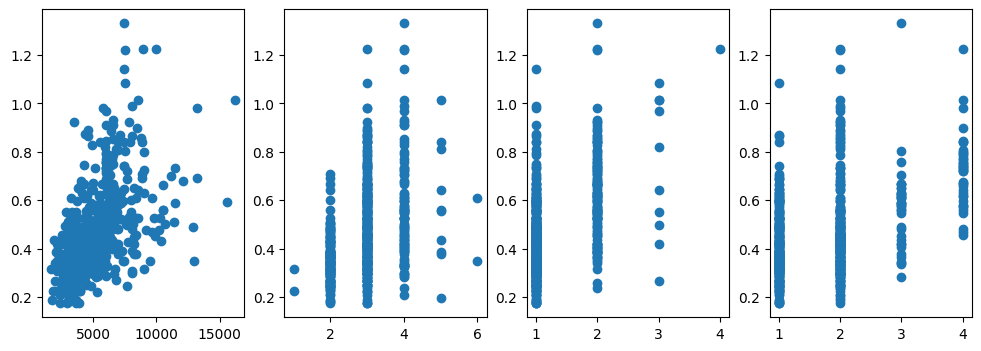

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
plot_data(ax, X, Y)

In [9]:
norm_ = tf.keras.layers.Normalization(axis=-1)
norm_.adapt(X)
Xn = norm_(X)

2023-04-20 14:41:12.670337: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


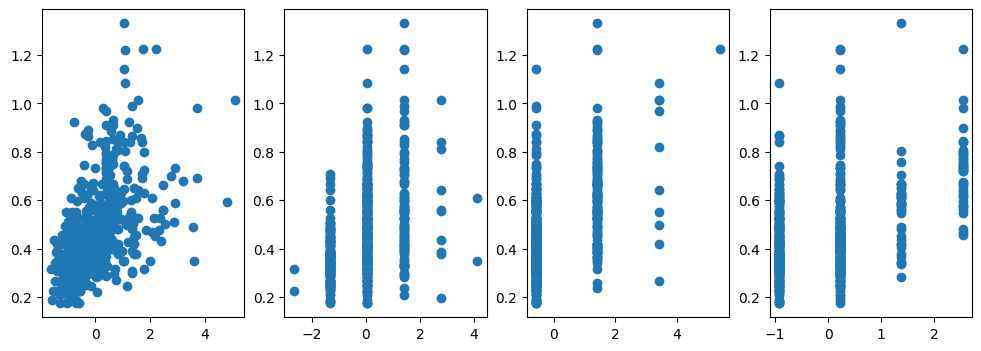

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
plot_data(ax, Xn, Y)

In [11]:
Y = Y.reshape(-1, 1)
Xt = np.tile(Xn, (100, 1))
Yt = np.tile(Y, (100, 1))
print(Xt.shape, Yt.shape)

(54500, 4) (54500, 1)


In [12]:
model = Sequential([
    

    tf.keras.Input(shape=(4, )),
    Dense(15, activation="relu", name="layer1"),
    Dense(3, activation="relu", name="layer2"),
    Dense(1, activation="relu", name="layer3"),
]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 15)                75        
                                                                 
 layer2 (Dense)              (None, 3)                 48        
                                                                 
 layer3 (Dense)              (None, 1)                 4         
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)
model.fit(Xt, Yt, epochs=10)

Epoch 1/10
1704/1704 [==============================] - 1s 356us/step - loss: 0.0155
Epoch 2/10
1704/1704 [==============================] - 1s 341us/step - loss: 0.0137
Epoch 3/10
1704/1704 [==============================] - 1s 341us/step - loss: 0.0133
Epoch 4/10
1704/1704 [==============================] - 1s 383us/step - loss: 0.0130
Epoch 5/10
1704/1704 [==============================] - 1s 356us/step - loss: 0.0129
Epoch 6/10
1704/1704 [==============================] - 1s 355us/step - loss: 0.0129
Epoch 7/10
1704/1704 [==============================] - 1s 362us/step - loss: 0.0126
Epoch 8/10
1704/1704 [==============================] - 1s 349us/step - loss: 0.0124
Epoch 9/10
1704/1704 [==============================] - 1s 380us/step - loss: 0.0123
Epoch 10/10
1704/1704 [==============================] - 1s 360us/step - loss: 0.0120


In [14]:
Ypredict = model.predict(Xn)


18/18 [==============================] - 0s 349us/step


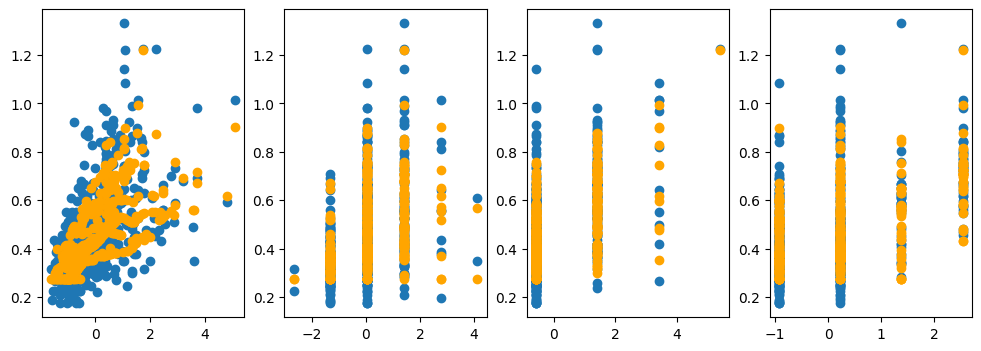

In [58]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
plot_data(ax, Xn, Y)
for i in range(len(ax)):
    ax[i].scatter(Xn[:, i], Ypredict, c="orange")